In [1]:
## Importing packages

import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

## Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

## Tree model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import shap

## Functions for methods
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

import math
import warnings
import numbers

/rds/general/user/sw5122/home/anaconda3/envs/test1/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data preparation

In [2]:
ukb_path = "/rds/general/project/hda-22-23/live/TDS/sw5122/ukb_ML.csv"
ukb_train_path ="/rds/general/project/hda-22-23/live/TDS/sw5122/ML_train.csv" 
ukb_test_path ="/rds/general/project/hda-22-23/live/TDS/sw5122/ML_test.csv" 
ukb_train_scale_path = "/rds/general/project/hda-22-23/live/TDS/sw5122/ML_train_scale.csv" 
ukb_test_scale_path = "/rds/general/project/hda-22-23/live/TDS/sw5122/ML_test_scale.csv" 

In [3]:
ukb = pd.read_csv(ukb_path, index_col="eid")
ukb_ml_train = pd.read_csv(ukb_train_path)
ukb_ml_test = pd.read_csv(ukb_test_path)
ukb_ml_train_scale = pd.read_csv(ukb_train_scale_path)
ukb_ml_test_scale = pd.read_csv(ukb_test_scale_path)

In [4]:
# Split X and Y (un-scaled data)
ukb_ml_train_x = ukb_ml_train.iloc[:,:-1]
ukb_ml_train_y = ukb_ml_train.iloc[:,-1]
ukb_ml_test_x = ukb_ml_test.iloc[:,:-1]
ukb_ml_test_y = ukb_ml_test.iloc[:,-1]

# Split X and Y(scaled data)
ukb_ml_train_scale_x = ukb_ml_train_scale.iloc[:,:-1]
ukb_ml_train_scale_y = ukb_ml_train_scale.iloc[:,-1]
ukb_ml_test_scale_x = ukb_ml_test_scale.iloc[:,:-1]
ukb_ml_test_scale_y = ukb_ml_test_scale.iloc[:,-1]

In [5]:
print(ukb_ml_train_x.shape)
print(ukb_ml_train_y.shape)
print(ukb_ml_test_x.shape)
print(ukb_ml_test_y.shape)

print(ukb_ml_train_scale_x.shape)
print(ukb_ml_train_scale_y.shape)
print(ukb_ml_test_scale_x.shape)
print(ukb_ml_test_scale_y.shape)

(22968, 45)
(22968,)
(46549, 45)
(46549,)
(22968, 45)
(22968,)
(46549, 45)
(46549,)


In [6]:
# ukb.head()
# print(ukb.isnull().sum())
# print(ukb.dtypes)

# ukb.loc[:,'HTN_prevalent_case'] = ukb.loc[:,'HTN_prevalent_case'].map({0:'N', 1:'Y'})
# ukb.loc[:,'Dyslipid_prevalent_case'] = ukb.loc[:,'Dyslipid_prevalent_case'].map({0:'N', 1:'Y'})
# ukb.iloc[:,-1] = ukb.iloc[:,-1].map({0:'N', 1:'Y'})
# ukb.dtypes
# ukb_test.dtypes
# ukb_train.dtypes

# ukb_train.iloc[:,-1]=ukb_train.iloc[:,-1].astype("category")
# ukb_test.iloc[:,-1]=ukb_test.iloc[:,-1].astype("category")
# ukb_train.dtypes
# ukb_test.dtypes

In [7]:
## Splite the data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(ukb.iloc[:,:-1], ukb.iloc[:,-1], test_size=0.2, random_state = 8)

## Resampling
# print(ukb.iloc[:,-1].value_counts()) # print controls vs cases in full dataset
# print(y_train.value_counts())
# Undersample = RandomUnderSampler(random_state = 8)
# X_full_train, y_full_train = Undersample.fit_resample(X_train, y_train)
# X_full_test = X_test

## Scale the data
# scale = StandardScaler()
# X_full_train = scaler.fit_transform(X_full_train)
# X_full_test = scaler.fit_transform(X_full_test)
# X_full_train = pd.DataFrame(X_full_train)
# X_full_train.columns = ukb.iloc[:,:-1].columns
# X_full_test = pd.DataFrame(X_full_test)
# X_full_test.columns = ukb.iloc[:,:-1].columns

## Prepare function

In [8]:
def performance(y_test, y_pred):
    acc = accuracy_score(np.array(y_test), np.array(y_pred))
    f1 = f1_score(np.array(y_test), np.array(y_pred))
    precision = precision_score(np.array(y_test), np.array(y_pred))
    recall = recall_score(np.array(y_test), np.array(y_pred))
    print('accuracy={}, f1={}, precision={}, recall={}'.format(acc, f1, precision, recall))

Function to plot decision tree

In [9]:
def cm_plot(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred, labels=[0,1])
    ax=plt.subplot()
    sns.heatmap(cm, annot=True)
    # lanels, title and ticks # Note: The first element of confusion_matrix()(ukb_test_y) is on the y axis
    ax.set_xlabel('Predict labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['Health','Diabetes'])
    ax.yaxis.set_ticklabels(['Health','Diabetes'])
    plt.show()

## Logistic regression

In [10]:
ukb_ml_train_x_log = ukb_ml_train_x.loc[:,["Sex", 'Age', 'Waist_Cir', 'BMI', "DM_Mother", "DM_Father", 'HDLC', 'Triglycerides',"Glucose" , "SBP"]]
ukb_ml_test_x_log = ukb_ml_test_x.loc[:,["Sex", 'Age', 'Waist_Cir', 'BMI', "DM_Mother", "DM_Father", 'HDLC', 'Triglycerides',"Glucose" , "SBP"]]

In [11]:
logistic_model = LogisticRegression(penalty = None, solver = 'newton-cholesky') 
logistic_model.fit(ukb_ml_train_x_log , ukb_ml_train_y)

LogisticRegression(penalty=None, solver='newton-cholesky')

In [12]:
y_pred_log_cls = logistic_model.predict(ukb_ml_test_x_log)
y_pred_log_prb = logistic_model.predict_proba(ukb_ml_test_x_log)
y_pred_log_prb = y_pred_log_prb[:,1]

In [13]:
logistic_model.coef_

array([[-0.06373904,  0.05428689,  0.0332298 ,  0.07458075,  0.62279053,
         0.47101884, -1.10469922,  0.11506562,  0.53216862,  0.00141095]])

accuracy=0.9523083202646674, f1=0.18859649122807018, precision=0.1781767955801105, recall=0.20031055900621117


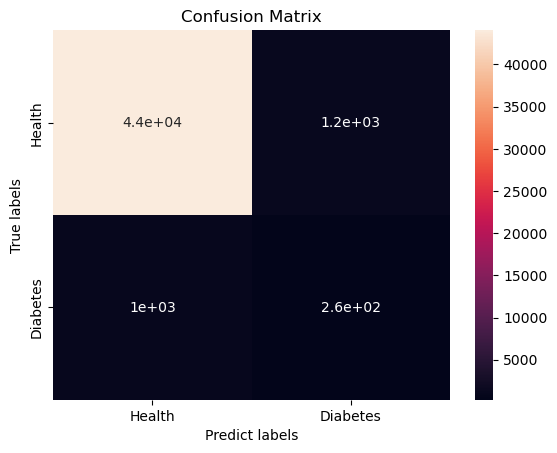

In [14]:
performance(ukb_ml_test_y, y_pred_log_cls)
cm_plot(ukb_ml_test_y, y_pred_log_cls)

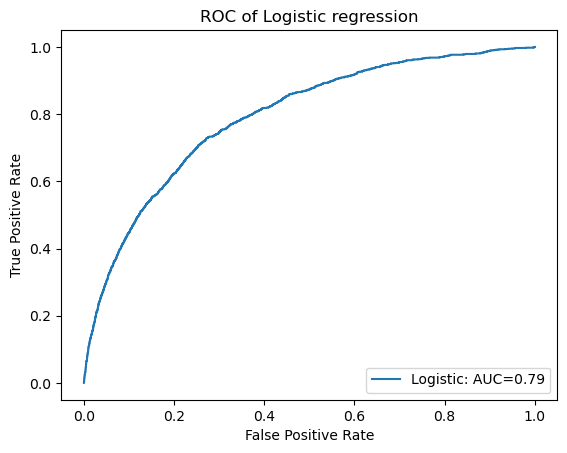

In [15]:
auc_log = roc_auc_score(ukb_ml_test_y, y_pred_log_prb)
auc_log = auc_log.round(2)
fpr_log_roc, tpr_log_roc, _ = roc_curve(ukb_ml_test_y,y_pred_log_prb)

# plot roc curve 
plt.plot(fpr_log_roc, tpr_log_roc, label='Logistic: AUC={}'.format(auc_log))
plt.title('ROC of Logistic regression')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Clustering & Logistic regression 

### Clustering 

In [16]:
ukb_ml_train_scale_x.columns

Index(['Sex', 'Age', 'SBP', 'DBP', 'Waist_Cir', 'BMI', 'Phy_Activity',
       'Smoking', 'Alcohol', 'shbg', 'Testosterone', 'CRP', 'Glucose', 'HbA1c',
       'IGF1', 'ALP', 'ALT', 'AST', 'Direct_bilirubin', 'GGT',
       'Total_bilirubin', 'ApoA', 'ApoB', 'Cholesterol', 'HDLC', 'LDLC',
       'Lipoprotein_A', 'Triglycerides', 'Albumin', 'Total_protein', 'Calcium',
       'Phosphate', 'Vitamin_D', 'urate', 'Urea', 'Creatinine', 'Cystatin_C',
       'Urine_Microalbumin', 'Urine_Creatine', 'Urine_Potassium',
       'Urine_Sodium', 'HTN', 'Dyslipid', 'DM_Mother', 'DM_Father'],
      dtype='object')

In [17]:
# Subset columns of bio and urine metrics
ukb_ml_train_scale_x_bio_urine = ukb_ml_train_scale_x.loc[:,['shbg', 'Testosterone', 'CRP', 'HbA1c', 'IGF1', 'ALP', 'ALT', 'AST', 'Direct_bilirubin', 'GGT', 'Total_bilirubin', 
                                                              'ApoA', 'ApoB', 'LDLC', 'Lipoprotein_A', 'Triglycerides', 'Albumin', 'Total_protein', 'Calcium', 'Phosphate', 'Vitamin_D', 
                                                              'urate', 'Urea', 'Creatinine', 'Cystatin_C', 'Urine_Microalbumin', 'Urine_Creatine', 'Urine_Potassium', 'Urine_Sodium']]
print(ukb_ml_train_scale_x_bio_urine.columns)
print(ukb_ml_train_scale_x_bio_urine.shape)

Index(['shbg', 'Testosterone', 'CRP', 'HbA1c', 'IGF1', 'ALP', 'ALT', 'AST',
       'Direct_bilirubin', 'GGT', 'Total_bilirubin', 'ApoA', 'ApoB', 'LDLC',
       'Lipoprotein_A', 'Triglycerides', 'Albumin', 'Total_protein', 'Calcium',
       'Phosphate', 'Vitamin_D', 'urate', 'Urea', 'Creatinine', 'Cystatin_C',
       'Urine_Microalbumin', 'Urine_Creatine', 'Urine_Potassium',
       'Urine_Sodium'],
      dtype='object')
(22968, 29)


In [18]:
n_cluster_list = list(range(3,11))
elb = []
silhouette = []
for n_clusters in n_cluster_list:
    # interating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state = 1)
    clusterer = clusterer.fit(ukb_ml_train_scale_x_bio_urine)
    clusterer_labels = clusterer.labels_
    # Finding the average silhouette score
    silhouette_avg = silhouette_score(ukb_ml_train_scale_x_bio_urine, clusterer_labels)
    silhouette.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is: ", silhouette_avg)
    # Finding the average SSE
    elb.append(clusterer.inertia_)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 3 The average silhouette_score is:  0.07996927730072959


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 4 The average silhouette_score is:  0.08166833817376727


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 5 The average silhouette_score is:  0.07778782666635806


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 6 The average silhouette_score is:  0.054740095908136055


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 7 The average silhouette_score is:  0.061087031381332965


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 8 The average silhouette_score is:  0.052751195646589776


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 9 The average silhouette_score is:  0.05416081726591662


The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 10 The average silhouette_score is:  0.05375137160340466


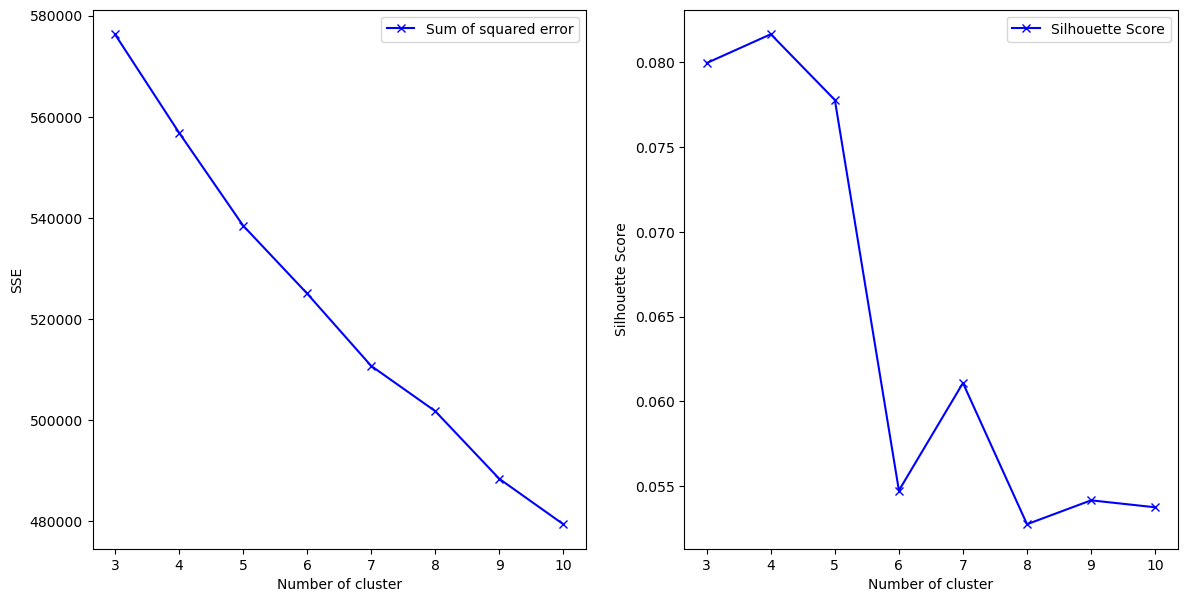

In [19]:
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(n_cluster_list, elb, 'bx-', label = "Sum of squared error")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(n_cluster_list, silhouette, "bx-", label="Silhouette Score")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

Refit with the best hyper-parameter

In [20]:
n_clusters = 4
# interating through cluster sizes
clusterer = KMeans(n_clusters = n_clusters, random_state = 1)
clusterer = clusterer.fit(ukb_ml_train_scale_x_bio_urine)
clusterer_labels = clusterer.labels_
# Finding the average silhouette score
silhouette_avg = silhouette_score(ukb_ml_train_scale_x_bio_urine, clusterer_labels)
print("For n_clusters =", n_clusters, "The average silhouette_score is: ", silhouette_avg)
# Finding the average SSE
elb.append(clusterer.inertia_)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


For n_clusters = 4 The average silhouette_score is:  0.08166833817376727


In [21]:
ukb_ml_train_scale_x_bio_urine.columns

Index(['shbg', 'Testosterone', 'CRP', 'HbA1c', 'IGF1', 'ALP', 'ALT', 'AST',
       'Direct_bilirubin', 'GGT', 'Total_bilirubin', 'ApoA', 'ApoB', 'LDLC',
       'Lipoprotein_A', 'Triglycerides', 'Albumin', 'Total_protein', 'Calcium',
       'Phosphate', 'Vitamin_D', 'urate', 'Urea', 'Creatinine', 'Cystatin_C',
       'Urine_Microalbumin', 'Urine_Creatine', 'Urine_Potassium',
       'Urine_Sodium'],
      dtype='object')

### Interpret the clustering with a decision tree

In [22]:
# Subset columns of bio and urine metrics
ukb_ml_train_x_bio_urine = ukb_ml_train_x.loc[:,['shbg', 'Testosterone', 'CRP', 'HbA1c','IGF1', 
                                                  'ALP', 'ALT', 'AST', 'Direct_bilirubin', 'GGT','Total_bilirubin', 
                                                  'ApoA', 'ApoB', 'LDLC','Lipoprotein_A', 'Triglycerides', 'Albumin', 'Total_protein', 
                                                  'Calcium','Phosphate', 'Vitamin_D', 'urate', 'Urea', 'Creatinine', 'Cystatin_C',
                                                  'Urine_Microalbumin', 'Urine_Creatine', 'Urine_Potassium','Urine_Sodium']]

In [23]:
clusterer_labels_tree = clusterer_labels.astype("str")

In [24]:
parameters = {'max_depth': range(5,25),'min_samples_leaf':[8,16,48,80,112,144,176,192,224,256], 'criterion':['gini', 'entropy']}
Cluster_tree = GridSearchCV(DecisionTreeClassifier(random_state = 8), parameters, n_jobs=8)
Cluster_tree.fit(X=ukb_ml_train_x_bio_urine , y=clusterer_labels_tree)
print(Cluster_tree.best_params_)
Cluster_tree_model = Cluster_tree.best_estimator_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 16}


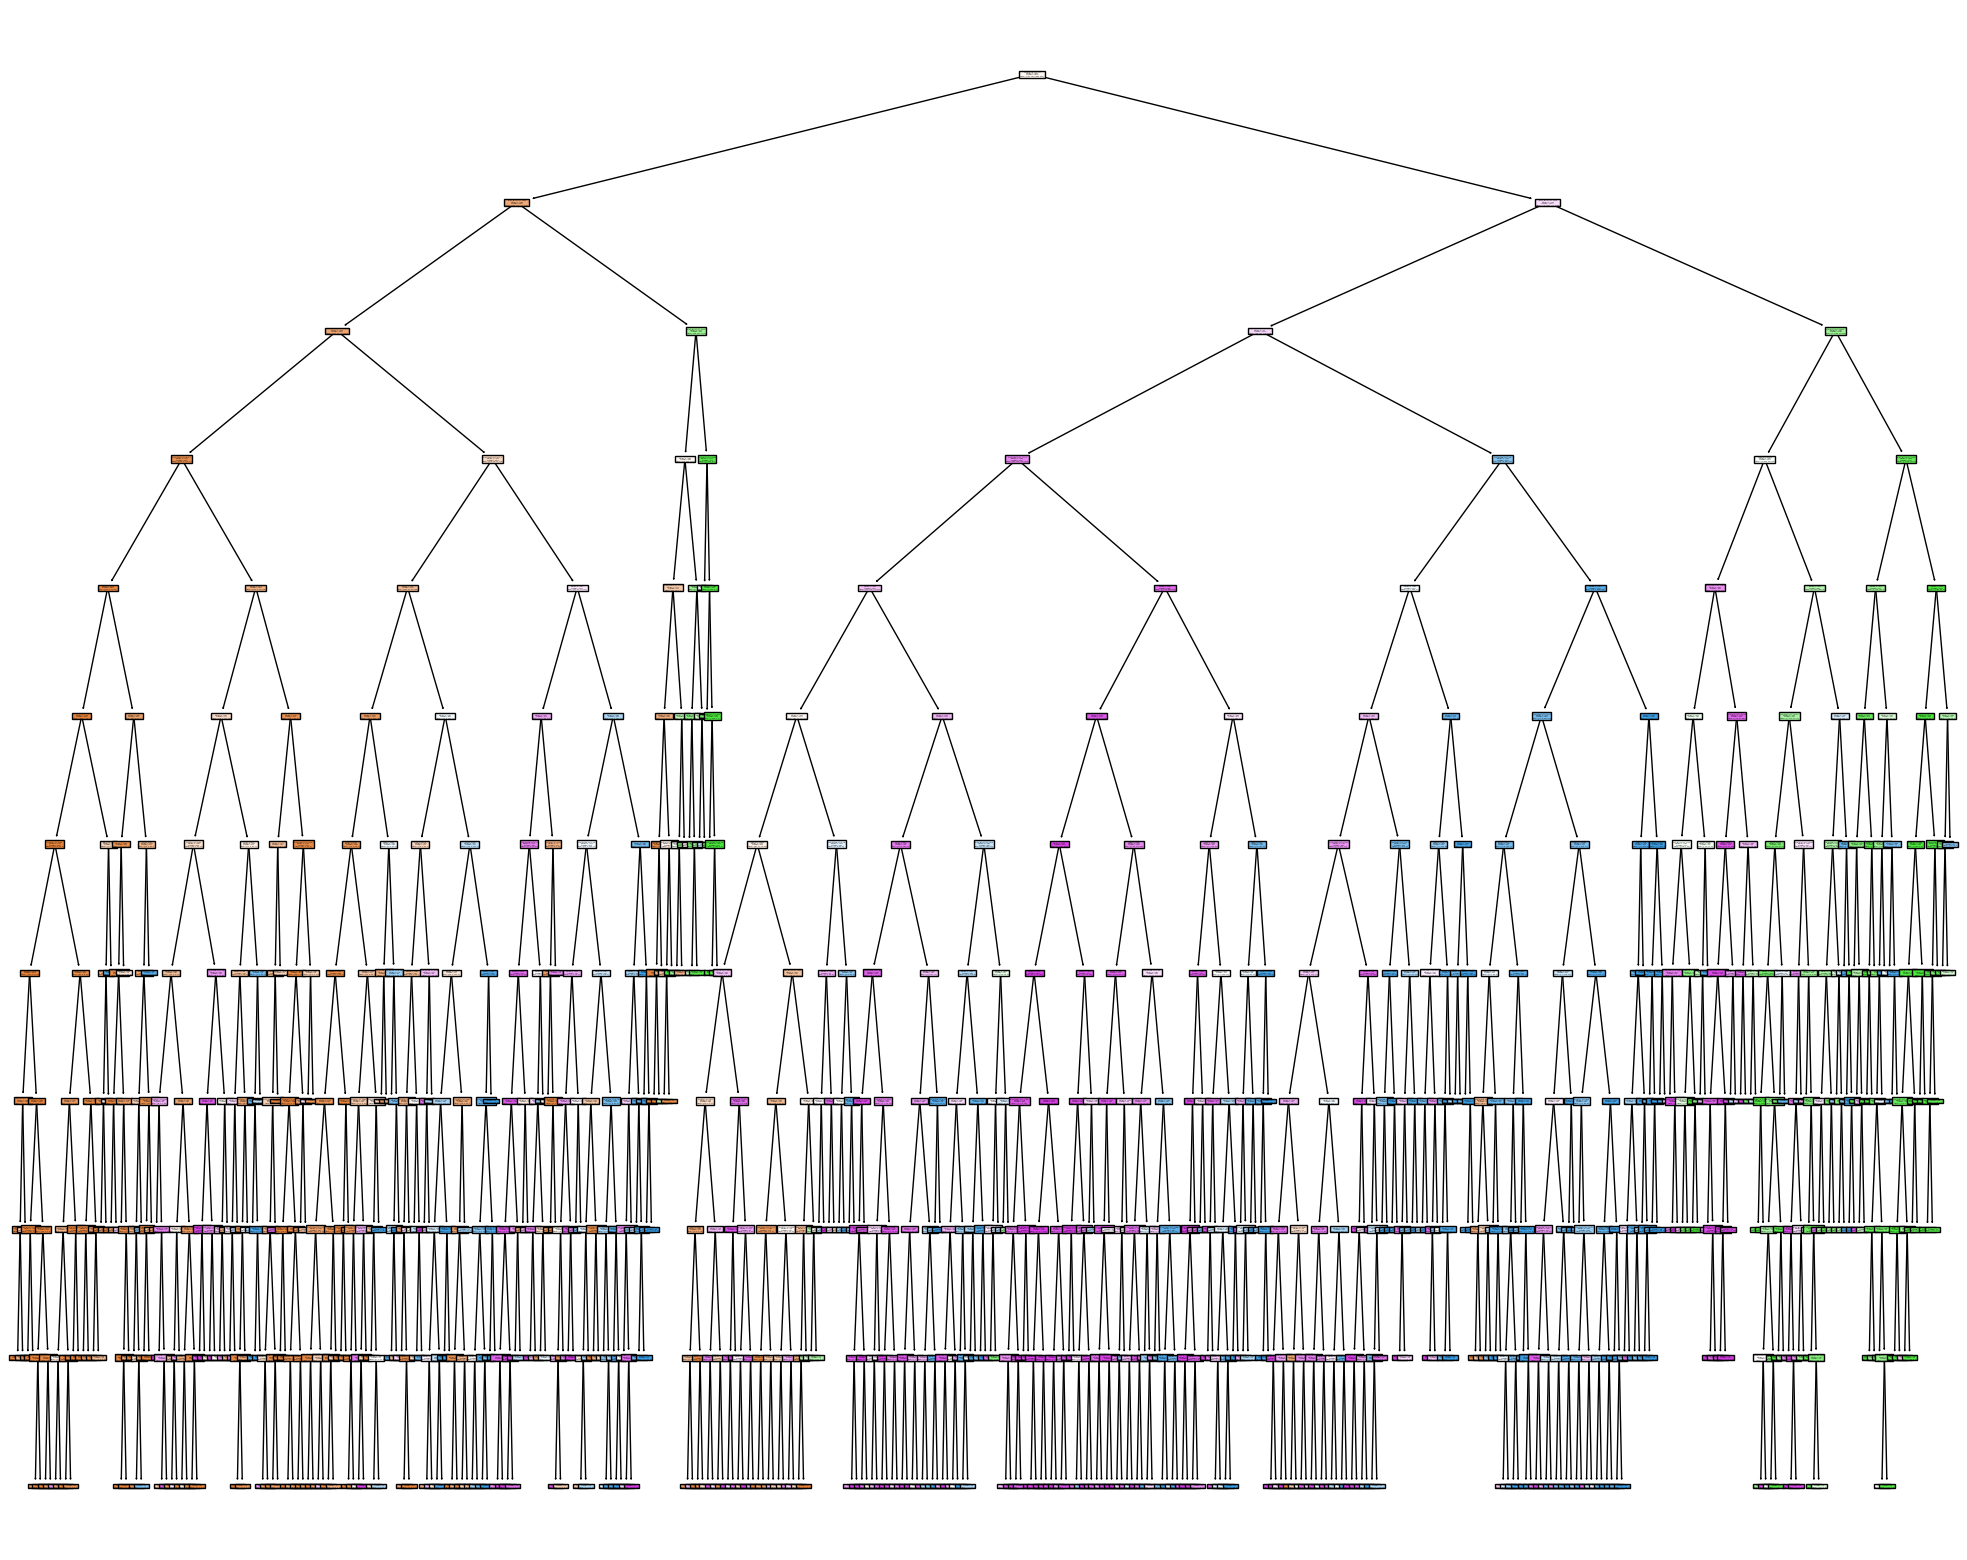

In [25]:
# Print decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Cluster_tree_model, feature_names=ukb_ml_train_x_bio_urine .columns, filled=True)
fig.savefig("Decision_tree_clustering.pdf")

### Interpret the tree model modeled on clustering with SHAP 

In [26]:
explainer_cluster = shap.TreeExplainer(Cluster_tree_model)
shap_values_cluster = explainer_cluster.shap_values(ukb_ml_train_x_bio_urine)

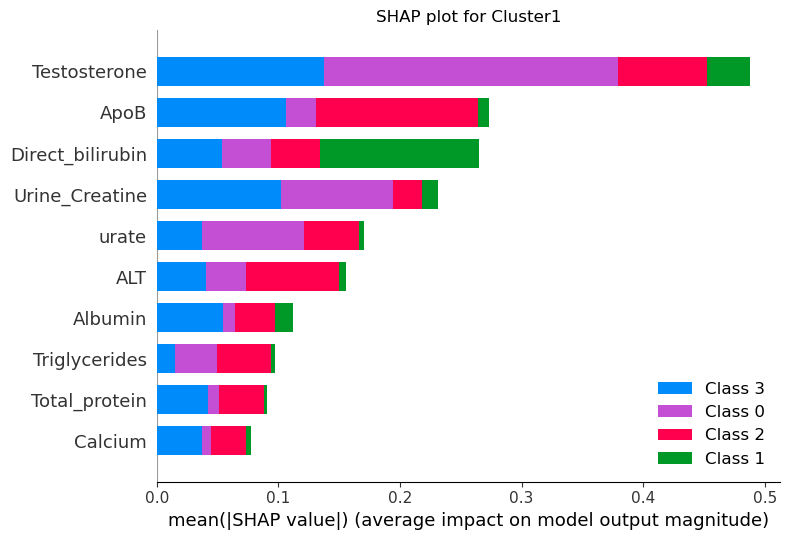

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


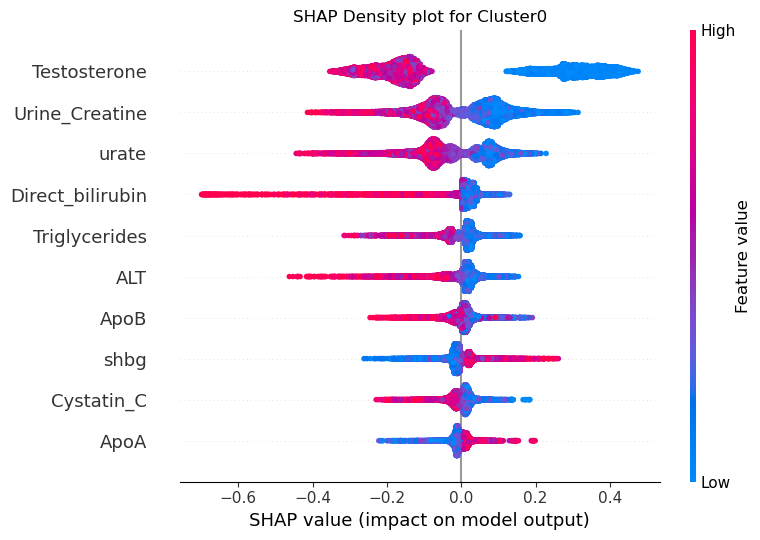

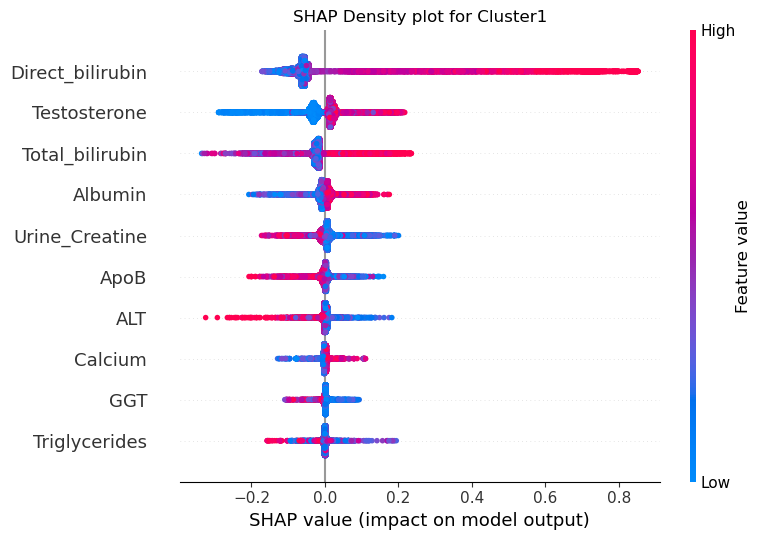

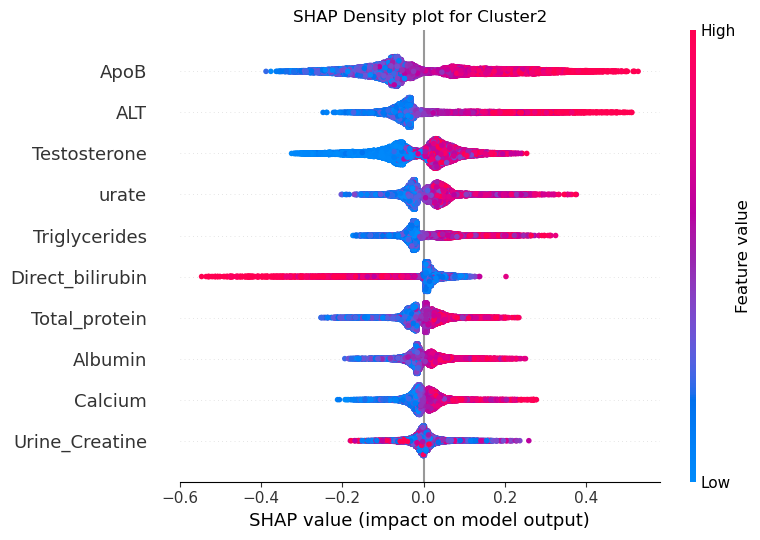

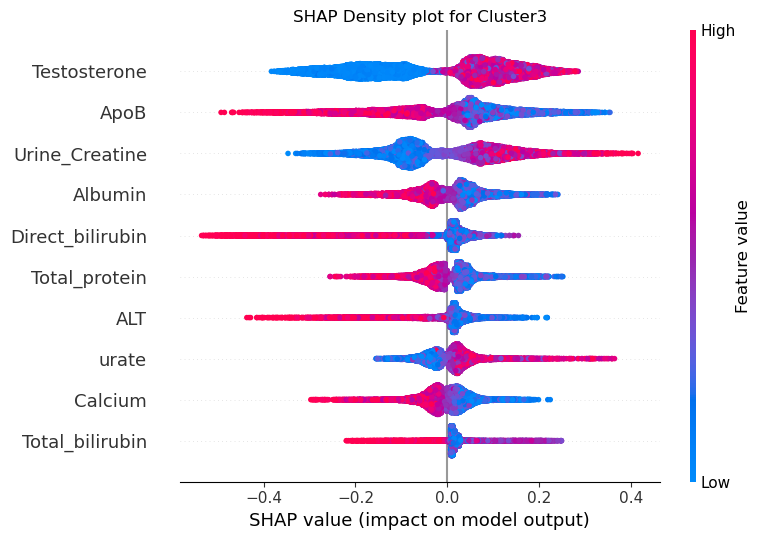

In [27]:
plt.title('SHAP plot for Cluster1')
# shap.summary_plot(shap_values_cluster, features = ukb_ml_train_x_clst, class_inds = [1], max_display=10)
shap.summary_plot(shap_values_cluster, features = ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster0')
shap.summary_plot(shap_values_cluster[0], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster1')
shap.summary_plot(shap_values_cluster[1], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster2')
shap.summary_plot(shap_values_cluster[2], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()

plt.title('SHAP Density plot for Cluster3')
shap.summary_plot(shap_values_cluster[3], ukb_ml_train_x_bio_urine, max_display=10)
plt.show()


## Logisitc regression on clustering

Training: Select variables for logistic regression

In [28]:
ukb_ml_train_x_clst = ukb_ml_train_x.loc[:, ['Sex', 'Age', 'SBP', 'DBP', 'Waist_Cir', 'BMI', 'Phy_Activity','Smoking', 'Alcohol', 
                                             'Glucose', 'Cholesterol', 'HDLC', 'HTN', 'Dyslipid', 'DM_Mother', 'DM_Father']]
ukb_ml_train_x_clst["clusters"] = clusterer_labels

Testing: Select variables for logistic regression

In [29]:
# Test set for clustering(scaled)
ukb_ml_test_scale_x_bio_urine = ukb_ml_test_scale_x.loc[:,['shbg', 'Testosterone', 'CRP', 'HbA1c','IGF1',
                                                           'ALP', 'ALT', 'AST', 'Direct_bilirubin', 'GGT','Total_bilirubin', 
                                                           'ApoA', 'ApoB', 'LDLC','Lipoprotein_A', 'Triglycerides', 'Albumin', 'Total_protein', 
                                                           'Calcium','Phosphate', 'Vitamin_D', 'urate', 'Urea', 'Creatinine', 'Cystatin_C',
                                                           'Urine_Microalbumin', 'Urine_Creatine', 'Urine_Potassium','Urine_Sodium']]
# Test set for logistic regrssion(unscaled)
ukb_ml_test_x_clst = ukb_ml_test_x.loc[:, ['Sex', 'Age', 'SBP', 'DBP', 'Waist_Cir', 'BMI', 'Phy_Activity','Smoking', 'Alcohol', 
                                             'Glucose', 'Cholesterol', 'HDLC', 'HTN', 'Dyslipid', 'DM_Mother', 'DM_Father']]

clusterer_labels_test = clusterer.predict(ukb_ml_test_scale_x_bio_urine)
ukb_ml_test_x_clst["clusters"] = clusterer_labels_test
ukb_ml_test_x_clst.describe()

,Sex,Age,SBP,DBP,Waist_Cir,BMI,Phy_Activity,Smoking,Alcohol,Glucose,Cholesterol,HDLC,HTN,Dyslipid,DM_Mother,DM_Father,clusters
count,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000,46549.000000
mean,0.544824,56.031257,139.509162,82.476809,89.915968,26.992171,3.642849,1.157490,4.106597,4.911981,5.590128,1.444757,0.061935,0.025199,0.080582,0.080883,1.468517
std,0.497992,8.156739,19.432760,10.639606,12.793156,4.369374,2.305749,0.512716,1.502505,0.560390,0.966735,0.365414,0.241040,0.156732,0.272195,0.272658,1.250858
min,0.000000,38.000000,74.000000,39.000000,20.000000,14.317000,0.000000,1.000000,1.000000,2.271000,2.173000,0.252000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,49.000000,126.000000,75.000000,81.000000,23.990100,2.000000,1.000000,3.000000,4.573000,4.915000,1.177000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,57.000000,138.000000,82.000000,90.000000,26.426200,3.000000,1.000000,4.000000,4.888000,5.596000,1.399000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,1.000000,63.000000,152.000000,89.000000,98.000000,29.319900,5.000000,1.000000,5.000000,5.220000,6.274000,1.668000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,73.000000,241.000000,139.000000,166.000000,56.662700,7.000000,3.000000,6.000000,6.998000,9.423000,3.350000,1.000000,1.000000,1.000000,1.000000,3.000000


### Fit Logistic regression

In [30]:
logistic_clstr_model = LogisticRegression(penalty = None, solver = 'newton-cholesky') 
logistic_clstr_model.fit(ukb_ml_train_x_clst, ukb_ml_train_y)

LogisticRegression(penalty=None, solver='newton-cholesky')

In [31]:
y_pred_log_clstr_cls = logistic_clstr_model.predict(ukb_ml_test_x_clst)
y_pred_log_clstr_prb = logistic_clstr_model.predict_proba(ukb_ml_test_x_clst)
y_pred_log_clstr_prb = y_pred_log_clstr_prb[:,1]
print(y_pred_log_clstr_prb.shape) 
print(y_pred_log_clstr_cls.shape) 

(46549,)
(46549,)


accuracy=0.949150357687598, f1=0.19844226210633256, precision=0.17597597597597597, recall=0.22748447204968944


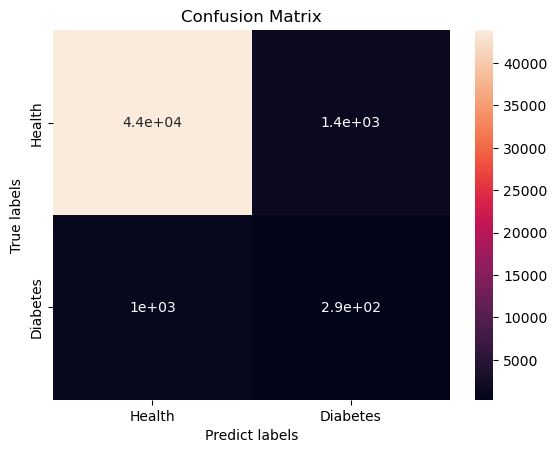

In [32]:
performance(ukb_ml_test_y, y_pred_log_clstr_cls)
cm_plot(ukb_ml_test_y, y_pred_log_clstr_cls)

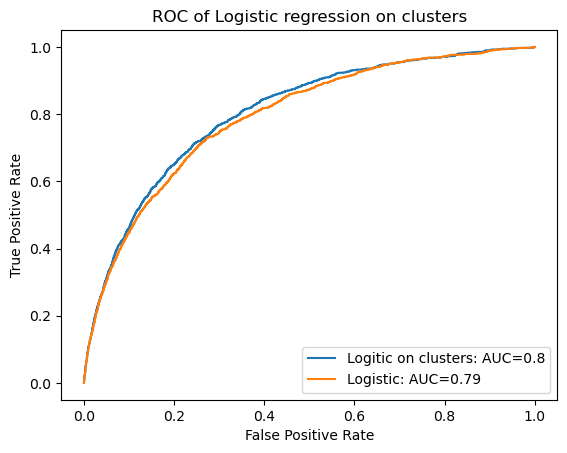

In [33]:
auc_log_clstr = roc_auc_score(ukb_ml_test_y, y_pred_log_clstr_prb)
auc_log_clstr = auc_log_clstr.round(2)
fpr_log_clstr_roc, tpr_log_clstr_roc, _ = roc_curve(ukb_ml_test_y, y_pred_log_clstr_prb)

# plot roc curve 
plt.plot(fpr_log_clstr_roc, tpr_log_clstr_roc, label='Logitic on clusters: AUC={}'.format(auc_log_clstr))
plt.plot(fpr_log_roc, tpr_log_roc, label='Logistic: AUC={}'.format(auc_log))
plt.title('ROC of Logistic regression on clusters')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

## Lasso

In [34]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(ukb_ml_train_scale_x, ukb_ml_train_scale_y)

LogisticRegression(penalty='l1', solver='liblinear')

In [35]:
y_pred_lasso_cls = lasso_model.predict(ukb_ml_test_scale_x)
y_pred_lasso_prb = lasso_model.predict_proba(ukb_ml_test_scale_x)
y_pred_lasso_prb = y_pred_lasso_prb[:,1]
print(y_pred_lasso_prb.shape) 
print(y_pred_lasso_cls.shape) 

(46549,)
(46549,)


0.8433343337421423


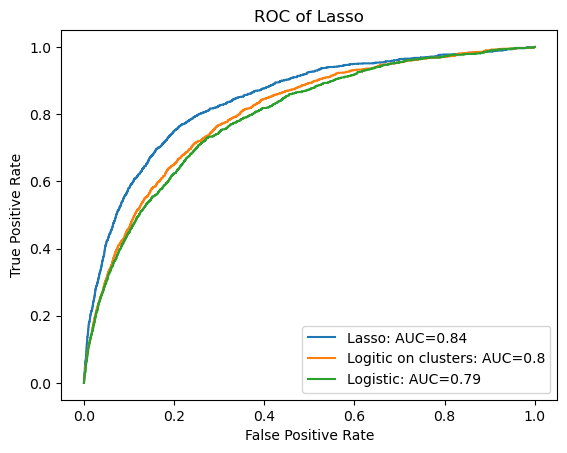

In [36]:
auc_lasso = roc_auc_score(ukb_ml_test_y, y_pred_lasso_prb)
print(auc_lasso)
auc_lasso = auc_lasso.round(2)
fpr_lasso_roc, tpr_lasso_roc, _ = roc_curve(ukb_ml_test_y,y_pred_lasso_prb)

# plot roc curve 
plt.plot(fpr_lasso_roc, tpr_lasso_roc, label='Lasso: AUC={}'.format(auc_lasso))
plt.plot(fpr_log_clstr_roc, tpr_log_clstr_roc, label='Logitic on clusters: AUC={}'.format(auc_log_clstr))
plt.plot(fpr_log_roc, tpr_log_roc, label='Logistic: AUC={}'.format(auc_log))
plt.title('ROC of Lasso')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [37]:
performance(ukb_ml_test_y, y_pred_lasso_cls)

accuracy=0.9213302111753207, f1=0.25081833060556463, precision=0.17027777777777778, recall=0.47593167701863354


## Random forest

### Decision tree to help with the forest model tuning

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
parameters = {'max_depth': range(5,25),'min_samples_leaf':[2,4,6,8,10,12,14,16,32,48,64,80,96,112,128,144,160,176, 192, 208, 224,240,256], 'criterion':['gini', 'entropy']}
clf_tree = GridSearchCV(DecisionTreeClassifier(random_state = 8), parameters, n_jobs=8)
clf_tree.fit(X=ukb_ml_train_x, y=ukb_ml_train_y)
tree_model = clf_tree.best_estimator_
y_pred_tree = tree_model.predict(X=ukb_ml_test_x)

Print performance metrics  & plot decision tree

In [ ]:
print(type(ukb_ml_test_y))
cm = confusion_matrix(ukb_ml_test_y, y_pred_tree)

In [ ]:
print(cm)

In [ ]:
print(clf_tree.best_params_)
performance(ukb_ml_test_y, y_pred_tree)
cm_plot(ukb_ml_test_y, y_pred_tree)

Print decision tree

In [ ]:
# Print decision tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, feature_names=ukb_ml_train_x.columns, class_names=['Health','Diabetes'], filled=True)
fig.savefig("Decision_tree.pdf")

## Random forrest (Full data) 

In [ ]:
parameters = {'max_features':['sqrt'], 'n_estimators':[100,200], 'max_depth':range(5,15),'min_samples_leaf':[64,72,96,112,128,144,160,176,192,208,224,256], 'criterion':['gini','entropy']}
# parameters = {'max_features':['sprt'], 'n_estimators':[50,100,250], 'max_depth':range(2,10),'min_samples_leaf':[2,8,16,32,64,128,256], 'criterion':['gini','entropy']}
rf_class = GridSearchCV(RandomForestClassifier(random_state=8), parameters, n_jobs=8)

In [68]:
rf_class.fit(X=ukb_ml_train_x, y=ukb_ml_train_y)
rf_model = rf_class.best_estimator_
print(rf_class.best_params_) # The best paramter

{'criterion': 'gini', 'max_depth': 14, 'max_features': 'sqrt', 'min_samples_leaf': 64, 'n_estimators': 200}


accuracy=0.9632859996992417, f1=0.21497473587505742, precision=0.26321709786276715, recall=0.18167701863354038


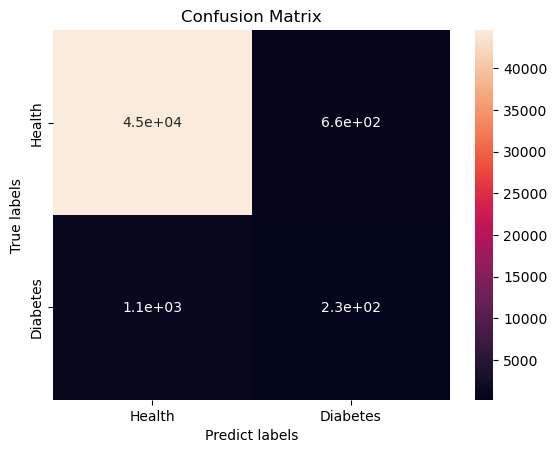

In [69]:
# Fit the model with test set
# predict and output 1/0
y_pred_rf = rf_model.predict(ukb_ml_test_x)
performance(ukb_ml_test_y, y_pred_rf)
cm_plot(ukb_ml_test_y, y_pred_rf)

In [70]:
# Predict and output probability
y_pred_rf_prb = rf_model.predict_proba(ukb_ml_test_x)
print(type(y_pred_rf_prb))

<class 'numpy.ndarray'>


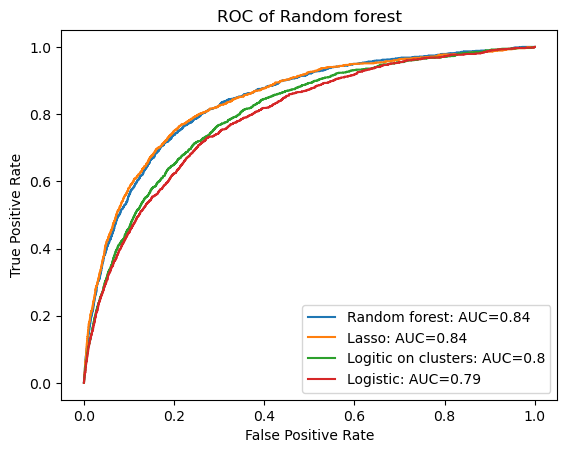

<Figure size 640x480 with 0 Axes>

In [72]:
from sklearn.metrics import roc_auc_score
auc_rf = roc_auc_score(ukb_ml_test_y, y_pred_rf_prb[:, 1])
auc_rf = auc_rf.round(2)
fpr_RF_roc, tpr_RF_roc, _ = roc_curve(ukb_ml_test_y,y_pred_rf_prb[:, 1])

# plot roc curve 
plt.plot(fpr_RF_roc, tpr_RF_roc, label='Random forest: AUC={}'.format(auc_rf))
plt.plot(fpr_lasso_roc, tpr_lasso_roc, label='Lasso: AUC={}'.format(auc_lasso))
plt.plot(fpr_log_clstr_roc, tpr_log_clstr_roc, label='Logitic on clusters: AUC={}'.format(auc_log_clstr))
plt.plot(fpr_log_roc, tpr_log_roc, label='Logistic: AUC={}'.format(auc_log))
plt.title('ROC of Random forest')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()
plt.savefig('Random forest.pdf')

Interpret Random Forest(Feature importance)

In [149]:
feature_rf = ukb_ml_train_x.columns
importance_rf = rf_model.feature_importances_
indices_rf = np.argsort(importance_rf)

feature_importance = pd.DataFrame({'var':[feature_rf[i] for i in indices_rf], 'value':importance_rf[indices_rf]})
print(feature_importance.shape)
print(feature_importance)
feature_importance_top20 = feature_importance.iloc[-20:,:]
print(feature_importance_top20.shape)
print(len(feature_importance_top20))
print(feature_importance_top20)

(45, 2)
                   var     value
0            DM_Father  0.000325
1              Smoking  0.000440
2            DM_Mother  0.001445
3             Dyslipid  0.001485
4         Phy_Activity  0.001516
5                  Sex  0.001643
6                  DBP  0.002613
7            Phosphate  0.002985
8      Urine_Potassium  0.003055
9              Calcium  0.003174
10       Total_protein  0.003191
11        Urine_Sodium  0.003416
12       Lipoprotein_A  0.003477
13      Urine_Creatine  0.003787
14                Urea  0.003891
15             Albumin  0.004015
16     Total_bilirubin  0.004106
17                 ALP  0.004297
18          Creatinine  0.004461
19                 SBP  0.004964
20           Vitamin_D  0.005008
21    Direct_bilirubin  0.005046
22             Alcohol  0.005091
23                 AST  0.007858
24        Testosterone  0.007884
25                IGF1  0.008623
26                ApoB  0.009165
27                 HTN  0.009872
28  Urine_Microalbumin  0.010230
29

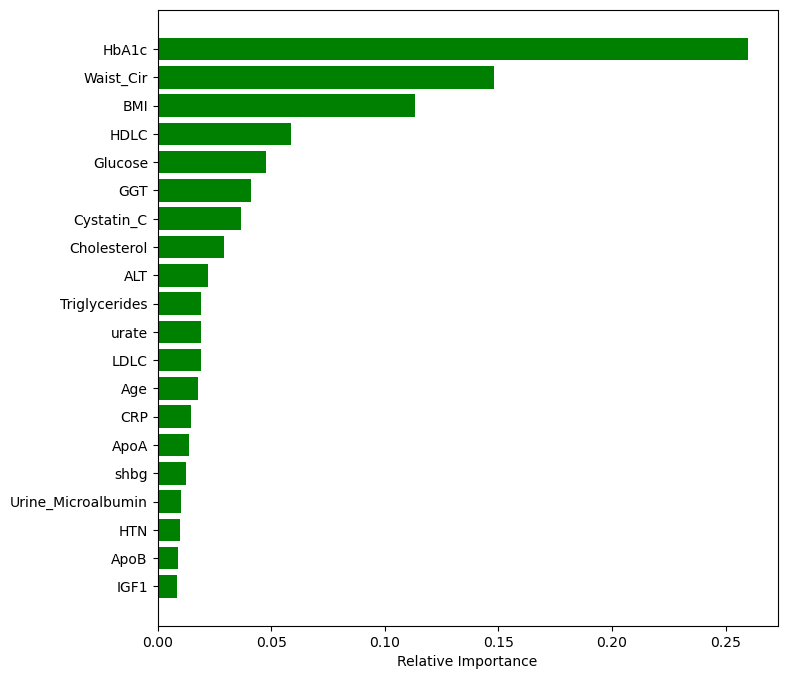

In [161]:
plt.figure(figsize = (8,8))
plt.title('')
plt.barh(range(len(feature_importance_top20)), feature_importance_top20.iloc[:,1] , color='green', align='center')
plt.yticks(range(len(feature_importance_top20)), feature_importance_top20.iloc[:,0])
plt.xlabel('Relative Importance')
plt.show()

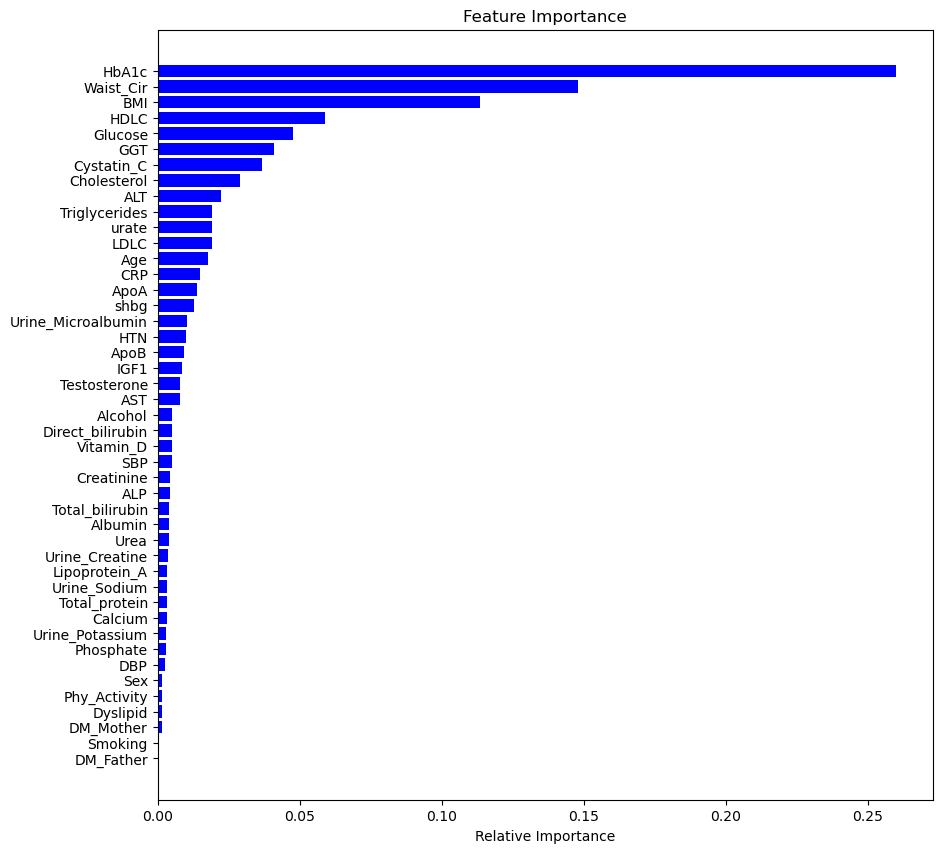

In [81]:
plt.figure(figsize = (10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices_rf)), importance_rf[indices_rf], color='b', align='center')
plt.yticks(range(len(indices_rf)), [feature_rf[i] for i in indices_rf])
plt.xlabel('Relative Importance')
plt.show()

In [165]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(ukb_ml_test_x)

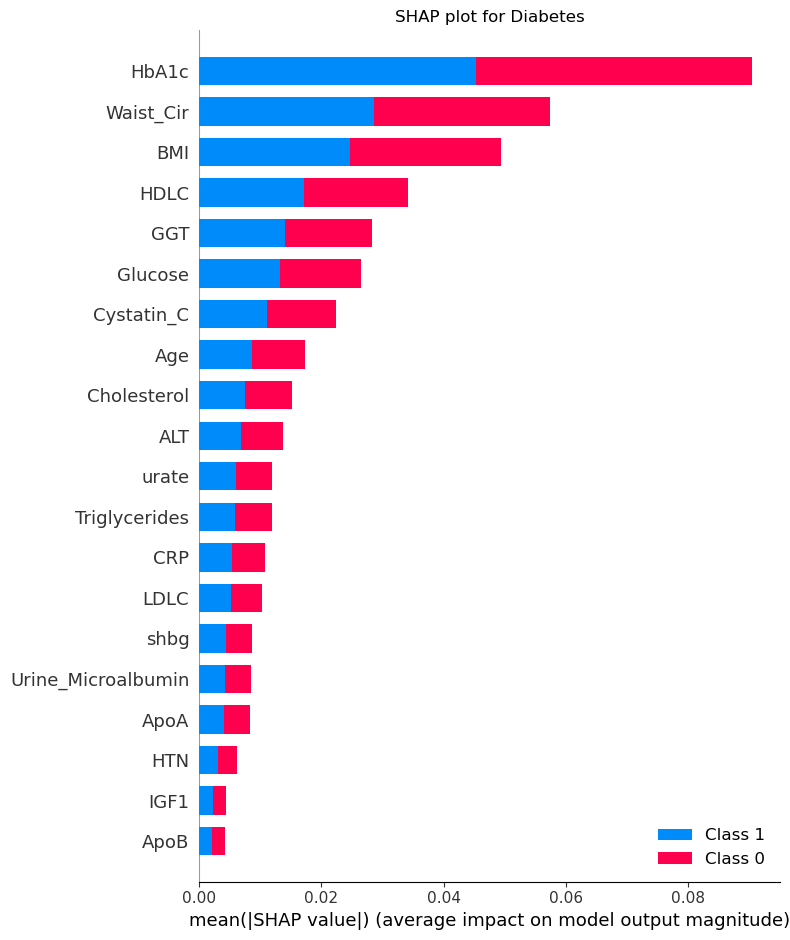

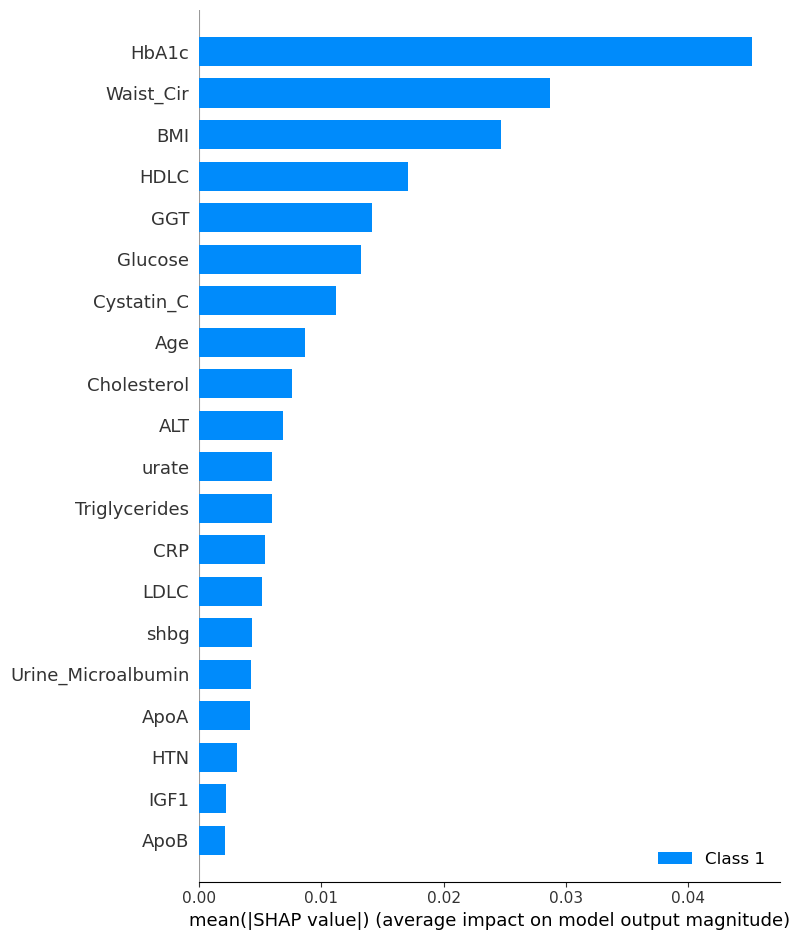

In [166]:
plt.title('SHAP plot for Diabetes')
shap.summary_plot(shap_values, features = ukb_ml_test_x)
shap.summary_plot(shap_values, features = ukb_ml_test_x, class_inds = [1])
plt.show()

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


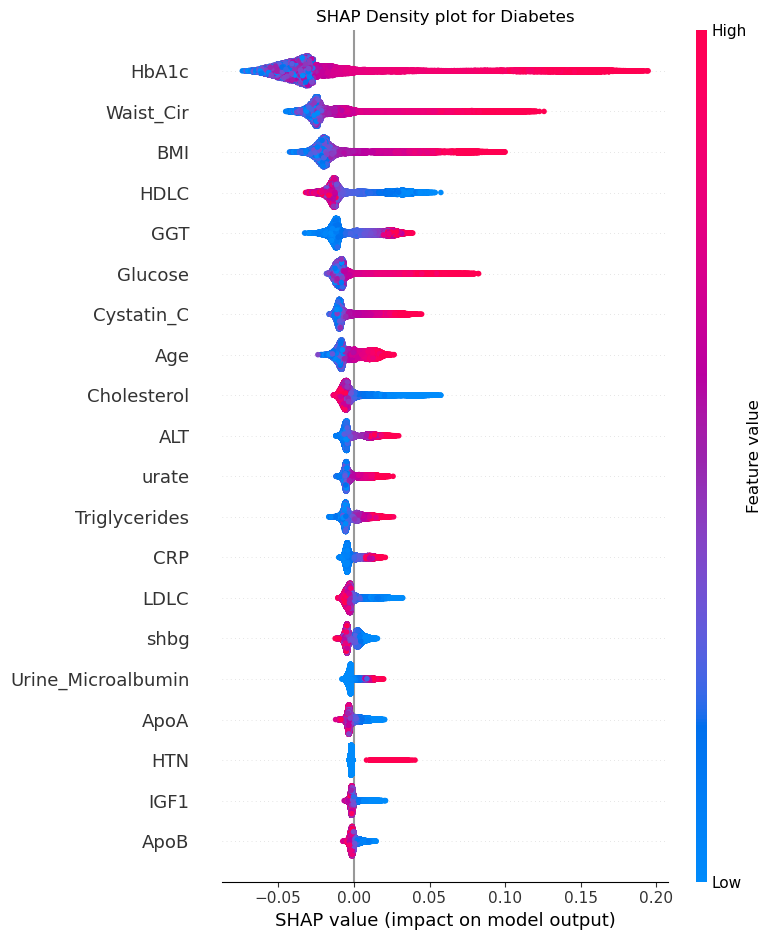

In [167]:
plt.figure(figsize = (8,8))
plt.title('SHAP Density plot for Diabetes')
shap.summary_plot(shap_values[1], features = ukb_ml_test_x)
plt.show()

## Artificial Neural network

In [168]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [169]:
# set global parameters
EPOCHS = 50
BATCH_SIZE = 256
LEARNING_RATE = 0.001

### Formatting data

In [170]:
from torch.utils.data import Dataset, DataLoader

# Train data
class trainData(Dataset):
    def __init__(self, X_data, y_data):
        self.X_data = torch.tensor(np.array(X_data),dtype=torch.float32)
        # np.array transforms the dataframe into a array (torch.tensor can't recognize dataframe)
        # torch.tensor transform an array into a tensor
        # declare the dtype to be torch.float32, which aligns with the type in ANN module
        self.y_data = torch.tensor(np.array(y_data), dtype=torch.float32)
    
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
    def __len__ (self):
        return len(self.X_data)

train_data = trainData(ukb_ml_train_scale_x, ukb_ml_train_scale_y)  

# Test data      
class testData(Dataset):
    def __init__(self, X_data):
        self.X_data = torch.tensor(np.array(X_data),dtype=torch.float32)
        # np.array transforms the dataframe into a array
        # torch.tensor transform an array into a tensor
        # declare the dtype to be torch.float32, which aligns with the type in ANN module
           
    def __getitem__(self, index):
        return self.X_data[index]
    
    def __len__ (self):
        return len(self.X_data)    
    

test_data = testData(ukb_ml_test_scale_x)

In [171]:
# Data loader: wrap the dataset as a data loader so the data can be iterated cy Batch
train_loader = DataLoader(dataset = train_data , batch_size = BATCH_SIZE , shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size = 1, shuffle = False)

In [172]:
# Re-format the dataset with torch.tensor(), view(), and double() 

# print(type(ukb_ml_train_scale_x))
# ann_train_x = np.array(ukb_ml_train_scale_x) # , tronsform into array
# ann_train_y = np.array(ukb_ml_train_scale_y)
# ann_test_x = np.array(ukb_ml_test_scale_x)
# ann_test_y = np.array(ukb_ml_test_scale_y)

# print(type(ann_train_x))

# ann_train_x = torch.tensor(ann_train_x)
# ann_train_x = ann_train_x.view(-1,59)
# ann_train_x = ann_train_x.double()

# ann_train_y = torch.tensor(ann_train_y)
# ann_train_y = ann_train_y.view(-1,1)
# ann_train_y = ann_train_y.double()

# ann_test_x = torch.tensor(ann_test_x)
# ann_test_x = ann_test_x.view(-1,59)
# ann_test_x = ann_test_x.double()

# ann_test_y = torch.tensor(ann_test_y)
# ann_test_y = ann_test_y.view(-1,1)
# ann_test_y = ann_test_y.double()

# print(type(ann_train_x))
# print(type(ann_train_y))
# print(ann_train_y.shape)
# print(ann_train_x.shape)

### Build ANN

In [227]:
class ANN_Classification(torch.nn.Module):
    def __init__(self):
        super(ANN_Classification, self).__init__()
        self.linear_layer1 = torch.nn.Linear(45, 32)
        self.linear_layer2 = torch.nn.Linear(32, 32)
        self.linear_layer3 = torch.nn.Linear(32, 32)
        self.linear_layer4 = torch.nn.Linear(32, 32)
        self.linear_layer5 = torch.nn.Linear(32, 32)
        self.layer_out = torch.nn.Linear(32,1)
        self.relu = nn.ReLU() 
        # we are going to use relu as the activation function
        # we can set nn.ReLU() here, which is a method of our class
        # we can also call it with F.relu() in the forward method, which is function from module torch.nn.functional
        self.dropout = nn.Dropout(p=0.1) # This is dropout rate
        self.batchnorm1 = nn.BatchNorm1d(32) # Perform mini batch normalization
        self.batchnorm2 = nn.BatchNorm1d(32)
        self.batchnorm3 = nn.BatchNorm1d(32)
        self.batchnorm4 = nn.BatchNorm1d(32)
        self.batchnorm5 = nn.BatchNorm1d(32)
    def forward(self, inputs):
        # forward propagation
        outputs = self.linear_layer1(inputs)
        outputs = self.relu(outputs)
        outputs = self.batchnorm1(outputs)
#         outputs = self.linear_layer2(outputs)
#         outputs = self.relu(outputs)
#         outputs = self.batchnorm2(outputs)
#         outputs = self.linear_layer3(outputs)
#         outputs = self.relu(outputs)
#         outputs = self.batchnorm3(outputs)
#         outputs = self.linear_layer4(outputs)
#         outputs = self.relu(outputs)
#         outputs = self.batchnorm4(outputs)
#         outputs = self.linear_layer5(outputs)
#         outputs = self.relu(outputs)
#         outputs = self.batchnorm5(outputs)
        outputs = self.dropout(outputs)
        outputs = self.layer_out(outputs)
        # will need to apply sigmoid transformation later
        return outputs

### Train our ANN

In [228]:
# Create an instance of our model
ANN_DM = ANN_Classification()
print(ANN_DM)
print(type(ANN_DM))

# Set loss function and optimizer
L = nn.BCEWithLogitsLoss() # Binary Cross Entropy Loss with LogitsLoss
# This contains sigmoid in it already so we don't need to include it in our forward layer 

# Use Adam optimizer
optimiser = torch.optim.Adam(ANN_DM.parameters(), lr=LEARNING_RATE)

ANN_Classification(
  (linear_layer1): Linear(in_features=45, out_features=32, bias=True)
  (linear_layer2): Linear(in_features=32, out_features=32, bias=True)
  (linear_layer3): Linear(in_features=32, out_features=32, bias=True)
  (linear_layer4): Linear(in_features=32, out_features=32, bias=True)
  (linear_layer5): Linear(in_features=32, out_features=32, bias=True)
  (layer_out): Linear(in_features=32, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm4): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm5): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
<class '__main__.ANN_Cl

Define accuracy function

In [229]:
def binary_acc(y_pred, y_test):
    # Classifying how arrurate our model is
    y_pred_tag = torch.round(torch.sigmoid(y_pred)) # turn our output into a 0/1 prediction
    
    correct_results_sum = (y_pred_tag == y_test).sum().float()
    acc = correct_results_sum / y_test.shape[0]
    acc = torch.round(acc*100)
    
    return acc

Forward propagation

In [230]:
ANN_DM.train()
for epoch in range(1, EPOCHS+1):
    epoch_loss = 0
    epoch_acc = 0
    for X_batch, y_batch in train_loader: 
        # iterate through batches
        y_pred = ANN_DM(X_batch) #make a prediction using our model
        # This is our forward propagation
        loss = L(y_pred, y_batch.unsqueeze(1)) # compute the loss # unsqueeze to remove the outest layer list structure 
        loss.backward() # backward propagation, differentiate the loss 
        optimiser.step() # take an optimisation step (update weights)
        optimiser.zero_grad() # reset gradients to zero (otherwise they accumulate)
        
        # calculate accuracy
        acc = binary_acc(y_pred, y_batch.unsqueeze(1))
        epoch_loss += loss.item() # .item return python number of the object
        epoch_acc += acc.item()
    print(f'Epoch {epoch+0:03}:| Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')


Epoch 001:| Loss: 0.60126 | Acc: 70.222
Epoch 002:| Loss: 0.46157 | Acc: 81.733
Epoch 003:| Loss: 0.37075 | Acc: 85.244
Epoch 004:| Loss: 0.33889 | Acc: 85.956
Epoch 005:| Loss: 0.33146 | Acc: 86.211
Epoch 006:| Loss: 0.32902 | Acc: 86.211
Epoch 007:| Loss: 0.32540 | Acc: 86.267
Epoch 008:| Loss: 0.32417 | Acc: 86.389
Epoch 009:| Loss: 0.32123 | Acc: 86.211
Epoch 010:| Loss: 0.32007 | Acc: 86.522
Epoch 011:| Loss: 0.31821 | Acc: 86.622
Epoch 012:| Loss: 0.31773 | Acc: 86.533
Epoch 013:| Loss: 0.31570 | Acc: 86.733
Epoch 014:| Loss: 0.31564 | Acc: 86.522
Epoch 015:| Loss: 0.31570 | Acc: 86.633
Epoch 016:| Loss: 0.31434 | Acc: 86.633
Epoch 017:| Loss: 0.31378 | Acc: 86.867
Epoch 018:| Loss: 0.31405 | Acc: 86.622
Epoch 019:| Loss: 0.31301 | Acc: 86.789
Epoch 020:| Loss: 0.31252 | Acc: 86.678
Epoch 021:| Loss: 0.31218 | Acc: 86.856
Epoch 022:| Loss: 0.31177 | Acc: 86.822
Epoch 023:| Loss: 0.31220 | Acc: 86.878
Epoch 024:| Loss: 0.31195 | Acc: 86.789
Epoch 025:| Loss: 0.31041 | Acc: 86.889


Test our ANN on test set

In [231]:
y_pred_prb_list = []
y_pred_tag_list = []
ANN_DM.eval()
with torch.no_grad():
    for X_batch in test_loader:
        y_test_pred = ANN_DM(X_batch)
        y_pred_prb = torch.sigmoid(y_test_pred)
        y_pred_prb_list.append(y_pred_prb.cpu().numpy())
        y_pred_tag = torch.round(y_pred_prb)
        y_pred_tag_list.append(y_pred_tag.cpu().numpy())
        

y_pred_tag_list = [a.squeeze().tolist() for a in y_pred_tag_list]
y_pred_prb_list = [a.squeeze().tolist() for a in y_pred_prb_list]

In [232]:
print(classification_report(ukb_ml_test_scale_y, y_pred_tag_list))
confusion_matrix(ukb_ml_test_scale_y, y_pred_tag_list)

              precision    recall  f1-score   support

           0       0.98      0.93      0.96     45261
           1       0.16      0.49      0.24      1288

    accuracy                           0.92     46549
   macro avg       0.57      0.71      0.60     46549
weighted avg       0.96      0.92      0.94     46549



array([[41996,  3265],
       [  655,   633]])

#### 1 hidden layer

In [236]:
auc_ann_1l = roc_auc_score(ukb_ml_test_y, y_pred_prb_list)
auc_ann_1l = auc_ann_1l.round(2)
print(auc_ann_1l)
fpr_ANN_1l_roc, tpr_ANN_1l_roc, _ = roc_curve(ukb_ml_test_y, y_pred_prb_list)

0.84


#### 2 hidden layer

In [225]:
auc_ann_2l = roc_auc_score(ukb_ml_test_y, y_pred_prb_list)
auc_ann_2l = auc_ann_2l.round(2)
print(auc_ann_2l)
fpr_ANN_2l_roc, tpr_ANN_2l_roc, _ = roc_curve(ukb_ml_test_y, y_pred_prb_list)

0.83


#### 3 hidden layer

In [212]:
auc_ann_3l = roc_auc_score(ukb_ml_test_y, y_pred_prb_list)
auc_ann_3l = auc_ann_3l.round(2)
print(auc_ann_3l)
fpr_ANN_3l_roc, tpr_ANN_3l_roc, _ = roc_curve(ukb_ml_test_y, y_pred_prb_list)

0.83


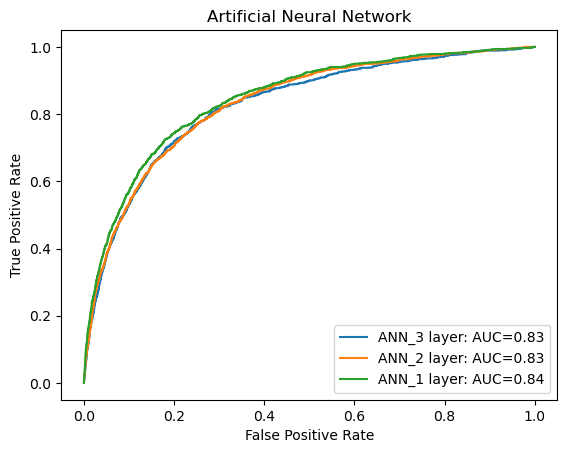

In [237]:
plt.plot(fpr_ANN_3l_roc, tpr_ANN_3l_roc, label='ANN_3 layer: AUC={}'.format(auc_ann_3l))
plt.plot(fpr_ANN_2l_roc, tpr_ANN_2l_roc, label='ANN_2 layer: AUC={}'.format(auc_ann_2l))
plt.plot(fpr_ANN_1l_roc, tpr_ANN_1l_roc, label='ANN_1 layer: AUC={}'.format(auc_ann_1l))
plt.title('Artificial Neural Network')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()

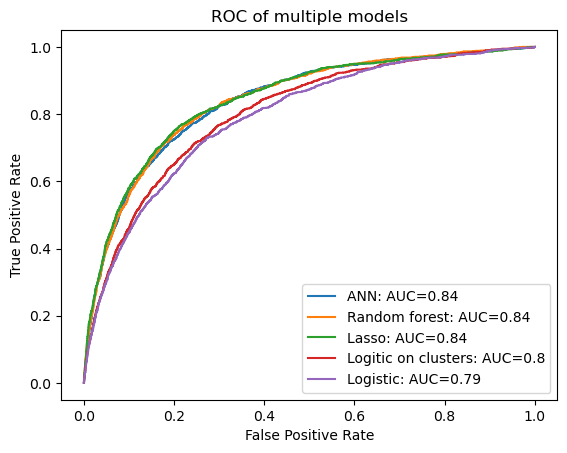

In [210]:
plt.plot(fpr_ANN_roc, tpr_ANN_roc, label='ANN: AUC={}'.format(auc_ann))
plt.plot(fpr_RF_roc, tpr_RF_roc, label='Random forest: AUC={}'.format(auc_rf))
plt.plot(fpr_lasso_roc, tpr_lasso_roc, label='Lasso: AUC={}'.format(auc_lasso))
plt.plot(fpr_log_clstr_roc, tpr_log_clstr_roc, label='Logitic on clusters: AUC={}'.format(auc_log_clstr))
plt.plot(fpr_log_roc, tpr_log_roc, label='Logistic: AUC={}'.format(auc_log))
plt.title('ROC of multiple models')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.show()